$\color{brown}{\text{HCIN 620 Lab 4 Supervised Learning Using Classification Algorithms}}$

In this lab we will learn to apply two ML classification algorithms to predict what causes heart disease. The dataset for this lab was made publicly available on Kaggle by Ronit using UCI de-identified cata donated by David W. Aha.

[Heart Disease UCI data dictionary](https://www.kaggle.com/ronitf/heart-disease-uci)

The original dataset is published at [link text](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

Notebook by Reza Afra, Ph.D. and Barbara Berkovich, Ph.D., M.A.

Revised by Thidarat Tinnakornsrisuphap, Ph.D.

# **STEP 1: Environment Setup**

**Import Code Libraries**


<br/>**Question 1**<br/>
Using your knowledge from modules 2 and 3, type the code to import the libraries for pandas, numpy, matplotlib (ggplot) and seaborn. Add a print statement to acknowledge that this step has been run.

**Run Import 1** for Input/output and plotting


In [1]:
# Answer 1: Type Import 1 code in this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Import 1 complete')

Import 1 complete


**Import 2** The sklearn preprocessing classes include OrdinalEncoder, StandardScaler, train_test_split, and new classes you'll be introduced to later in the lab. We also bring in classes to evaluate the models. This import also supresses pesky warnings, resulting in a cleaner run package.

**Run import 2** for preprocessing and evaluation libraries



In [2]:
# Import 2 preprocessing and evaluation libraries
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import  accuracy_score, confusion_matrix
# Suppress pesky warnings
import warnings
warnings.filterwarnings("ignore")
print ('Import 2 preprocessing and evaluation libraries complete')

Import 2 preprocessing and evaluation libraries complete



**Run Import 3** for machine learning algorithms.

In [3]:
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

print('Import 3 machine learning algorithms complete')

Import 3 machine learning algorithms complete


# **STEP 2: Data Cleaning**

**Use the Folder and upload icons (left) to upload data-lab-4-heart.csv**

**Run the code** to read the heart data in the Colab Runtime Environment.

In [4]:
df = pd.read_csv('data-lab-4-heart.csv')
data = df.copy()
print('Data connection complete')

Data connection complete


**Question 2** </br>
Insert the Python command to display first 10 rows of data and run it. Always look at the data before doing anything else.

**Run the code.**

In [5]:
# Answer 2: Enter the command to generate a dataset header in this cell.
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


 Identify the categorical variables by inspections.  

**Question 3** Edit this text box to list the categorical variables

Answer: Fill in categorical variable names on the list below. Add as many lines as needed.

1. sex
2. cp
3. fbs
4. restecg
5. exang
6. slope
7. ca
8. thal
9. target


Here are the descriptions of each column.
*   **age** age
*   **sex** sex
*   **cp**  chest pain type (4 values)
*   **trestbps** resting blood pressure
*   **chol**    serum cholestoral in mg/dl
*   **fbs**     fasting blood sugar > 120 mg/dl
*   **restecg** resting electrocardiographic results (values 0,1,2)
*   **thalach**  maximum heart rate achieved
*   **exang**   exercise induced angina
*   **oldpeak** ST depression induced by exercise relative to rest
*   **slope**   the slope of the peak exercise ST segment
*   **ca**      number of major vessels (0-3) colored by flourosopy
*   **thal**    3 = normal; 6 = fixed defect; 7 = reversable defect
*   **target**  

##Check for missing values


**Question 4** Enter the code to check for missing values, and then run it.


In [6]:
## Answer 4: Enter the code to check for missing values.
data.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Another step in data cleaning involves checking for duplicate values. Before making any more changes to the dataset, determine the number of rows and columns in the dataset using the shape command.

**Question 5** </br> Before making any more changes to the dataset, determine the number of rows and columns in the dataset using the shape command.

In [7]:
#Answer 5: Enter the shape command in this cell, and run it.
print(f'Number of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

Number of rows: 303
Number of columns: 14


## Check for duplicates


**Question 6** Enter the code to check for duplicates using the drop_duplicates command and run it.



In [8]:
##Answer 6: Enter the drop_duplicates command as follows:

data.drop_duplicates(inplace=True) ##Drop duplicates and return the results to the current dataframe rather than creating a new one.
# row indexs doesn't change after dropping (so still the last index is 302)

**Question 7** Repeat the shape command, and run it.

In [9]:
# Answer 7: Repeat the shape command
data.shape

(302, 14)

**Question 8** Edit this cell to answer the questions:

**Answer 8**
1.  How many rows are there now? 302
2.  How many duplicates were dropped? 1

# **STEP 3: Exploratory Data Analysis (EDA) and Preprocessing**

##Descriptive Statistics

**Question 9** </br> Use the **describe** command to display descriptive statistics for continuous variables in the data frame. Include the .05 and .95 percentiles. Include the following columns in the table:
age, trestbps, chol, thalach, oldpeak.

In [10]:
## Answer 9 Enter the describe command in this cell.
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe(percentiles=[.05, .25, .5, .75, .95])


,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
5%,40.00000,108.000000,175.050000,108.050000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
95%,68.00000,160.000000,326.950000,181.950000,3.400000
max,77.00000,200.000000,564.000000,202.000000,6.200000


**Question 10**

Answer the following questions based on the table above.

**Answer 10**
1.  How many people are in this dataset? 302
2.  What is the range of ages? 77 - 29 = 48
3.  List the mean and 50th percentile for Chol.

  mean: 246.5

  50th percentile: 240.5
4.  Explain the difference between the mean and the 50th percentile.

The mean is the average, with formula of (x1 + x2 + ... + xn)/n, but the 50th perventile is the median, the middle value when all data point are arranged in order.
5.  What is the clinical significance?

Clinical significance refers to whether a finding has practically meaningful importance for patients, not just being a statistically significant difference. It considers whether the effect is large enough to impact medical decision making, treatment selection, and health outcomes in actual clinical settings.



**Question 11** Let's look more closely at the distribution of cholestrol in patients. Enter the seaborn (sns) command to plot a histogram of chol.

<Axes: xlabel='chol', ylabel='Count'>

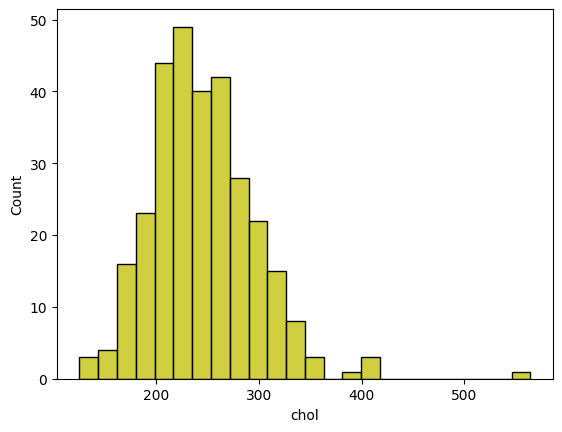

In [ ]:
# Answer 11: Enter code to plot a histogram of cholesterol lab results
sns.histplot(data['chol'], color='y')

## Check for outliers

**Question 12**  
Enter the seaborn (sns) command to generate a boxplot of chol.

<Axes: ylabel='chol'>

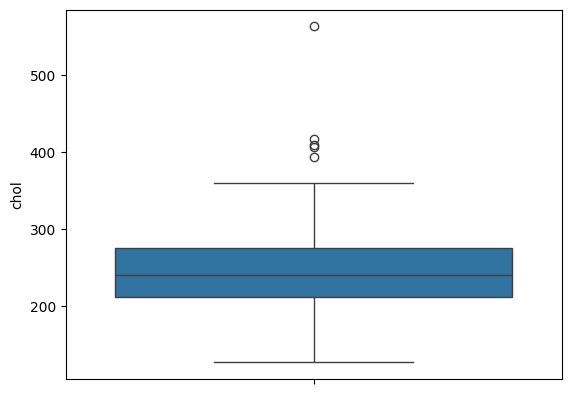

In [20]:
#Answer 12: Box Plot of Cholesterol
sns.boxplot(data=data['chol'])

In [26]:
# number of outliers
outlier_counts = {}
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts

{'age': 0,
 'sex': 0,
 'cp': 0,
 'trestbps': 9,
 'chol': 5,
 'fbs': 45,
 'restecg': 0,
 'thalach': 1,
 'exang': 0,
 'oldpeak': 5,
 'slope': 0,
 'ca': 25,
 'thal': 2,
 'target': 0}

**Question 13** </br>

Use the two plots to answer the following questions. Enter the answers in this text cell.

**Answer 13**

1. Are there outliers in cholestrol measurements? Yes
2. How many? 5 (according to the cell above)


##Select target and features

**The Target is what we want to predict.** In our pre-labeled dataset, the variable called "target" refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**The Features are variables used by the model to predict the target.**

**Question 14**
Edit this text cell with your answers to the following questions.

**Answer 14**
1. Which features do you think might be the most important features in this dataset for predicting heart disease? exang (exercise induced angina)
2  Why? Because it has the highest corrolation value.


**Question 15**

Run a correlation table that shows how all of the columns correlate with the target variable. Sort the values in ascending order.

In [40]:
## Answer 15: Enter the correlation of each column to the target
data.corr()['target'].sort_values()

,target
exang,-0.435601
oldpeak,-0.429146
ca,-0.408992
thal,-0.343101
sex,-0.283609
age,-0.221476
trestbps,-0.146269
chol,-0.081437
fbs,-0.026826
restecg,0.134874


**Question 16** Edit this text box to identify the top four features correlated with target? Remember that the magnitude of the correlation is more important than the sign (+/-).

**Answer 16**

1. exang,	-0.435601
2. cp,	0.432080
3. oldpeak,	-0.429146
4. thalach,	0.419955


Run the code below to generate a heatmap.

<Axes: >

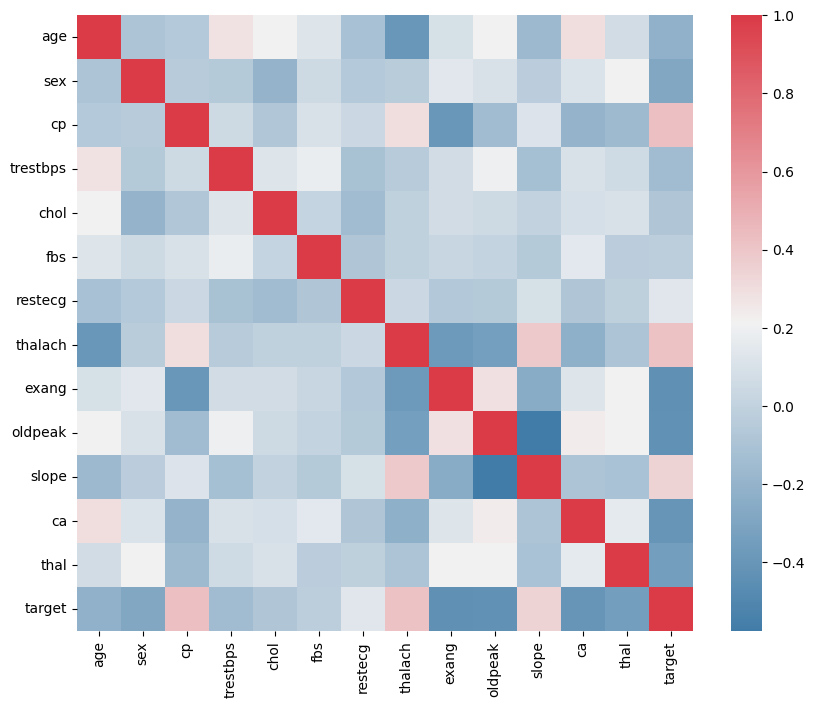

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Red is the highest correlation. The diagonal red line shows that each variable is 100% correlated with itself. Pink and light blue show weaker correlations.

**Question 17**</br>
 List a few correlated features not identified in question 9, along with their approximate correlation coefficients. Estimate using the color legend on the right.

 **Answer 17**
 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'

 1. cp with exang, -0.45
 2. sex with chol, -0.25
 3. cp with ca, -0.25

##Isolate features from target

The first step in preprocessing is to create a features dataframe that does not include the target variable. Run the code below to do that. We assign the number of attributes (remaining columns) to the variable features.

In [43]:
features = data.drop(["target"], axis=1)
print(features) # Display the new table that does not include the target variable.
print('features isolated')

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

##Build pipeline for scaling and encoding

You identified the categorical and continuous variables in questions 3 and 5 respectively. Now we perform a standard scaling on numerical columns and ordinal encoding on the categorical columns. The code to do this uses a pipeline to combine several transformations into one step. Then, the transformed data is assigned to X, and the target is assigned to Y.

In [45]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), ['age','trestbps','chol','thalach','oldpeak']),   # All the categorical columns
    ("cat", OrdinalEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']) ]) # All the non-categorical columns
x = pd.DataFrame(full_pipeline.fit_transform(features))
y = data["target"] # Pick the last column.
print(x) # Display the transformed data.
print('regression x and y assigned')


           0         1         2         3         4    5    6    7    8   \
0    0.949794  0.764066 -0.261285  0.018826  1.084022  1.0  3.0  1.0  0.0   
1   -1.928548 -0.091401  0.067741  1.636979  2.118926  1.0  2.0  0.0  1.0   
2   -1.485726 -0.091401 -0.822564  0.980971  0.307844  0.0  1.0  0.0  0.0   
3    0.174856 -0.661712 -0.203222  1.243374 -0.209608  1.0  1.0  0.0  1.0   
4    0.285561 -0.661712  2.080602  0.587366 -0.382092  0.0  0.0  0.0  1.0   
..        ...       ...       ...       ...       ...  ...  ...  ...  ...   
297  0.285561  0.478910 -0.106449 -1.161988 -0.727060  0.0  0.0  0.0  1.0   
298 -1.042904 -1.232023  0.338703 -0.768384  0.135360  1.0  3.0  0.0  1.0   
299  1.503322  0.707035 -1.035462 -0.374779  2.032684  1.0  0.0  1.0  1.0   
300  0.285561 -0.091401 -2.235438 -1.511859  0.135360  1.0  0.0  0.0  1.0   
301  0.285561 -0.091401 -0.203222  1.068439 -0.899544  0.0  1.0  0.0  0.0   

      9    10   11   12  
0    0.0  0.0  0.0  1.0  
1    0.0  0.0  0.0  2.0

**Question 18** <br>
Edit this text box to answer the questions below.

**Answer 18**

1. What justifies the use of ordinal encoding on our categorical columns? Ordinal encoding maintains the relative relationship between different levels of each categorical variable which works for our categorical variables.
2. In what situations can we use ordinal encoding? In cases where there is relative relationship between different levels of each categorical variable.



**Run the code** to view the transformed data.

In [46]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0


##Split the data

Just like we did in Module 3 we split the data

In [48]:
TEST_SIZE = 0.3
RANDOM_STATE = 42


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE ,random_state=RANDOM_STATE )

print('Splitting complete')

Splitting complete


#**STEP 4: Build the Models**
The purpose of feature engineering in general is to find the best features for the least complex model. Here we take the easiest route and include all features to establish a baseline. Remember to always start from the simplest nontrivial model. In future tuning of the models, we may find that some features work better than others for predicting whether the patient has heart disease.

##Logistic Regression

The first algorithm we are going to use is logistic regression.

**Run the code** for training and testing the logistic regression model. The code outputs the level of accuracy between the predicted and test values.

In [49]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

 Accuracy on test set: 0.824


##Confusion Matrix

The confusion matrix is a visualization of the actual number of True Positives and Negatives, and False Positives and Negatives.

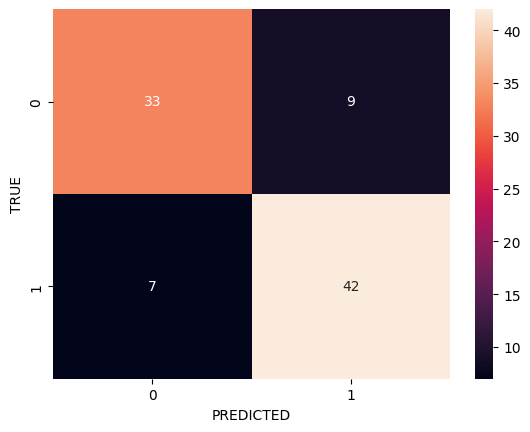

In [50]:
# Confusion Matrix

data_ = {'y_true':y_test,
        'y_pred': y_pred
        }

df = pd.DataFrame(data_, columns=['y_true','y_pred'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_pred'], rownames=['TRUE'], colnames=['PREDICTED'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

##K-Nearest Neighbors

<br/>The next classification algorithm is k-nearest neighbors.


**Run the code** for training and testing the k nearest neighbors model. The code outputs the level of accuracy between the predicted and test values.

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

 Accuracy on test set: 0.846


##Confusion Matrix

The confusion matrix is a visualization of the actual number of True Positives and Negatives, and False Positives and Negatives.

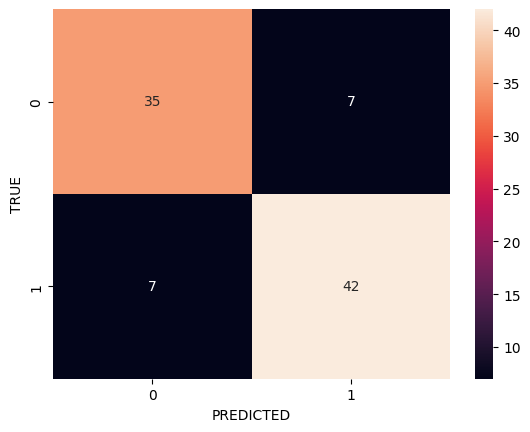

In [52]:
# Confusion Matrix

data_ = {'y_true':y_test,
        'y_pred': y_pred
        }

df = pd.DataFrame(data_, columns=['y_true','y_pred'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_pred'], rownames=['TRUE'], colnames=['PREDICTED'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

## Model Tuning

Some models can be fine-tuned by changing processing parameters. In this case, we'd like to find out how many neighbors are optimal. To that end, we test from 1 to 10 neighbors.

In [53]:
# Find the optimal number of neighbors
accuracies = []
for N in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

accuracies = np.array(accuracies) # convert to numpy array
print('KNeighborsClassifier complete for 1-10 neighbors')


KNeighborsClassifier complete for 1-10 neighbors


**Run the code** to plot the accuracy of the model(x) based on the number of neighbors(y).

<Axes: >

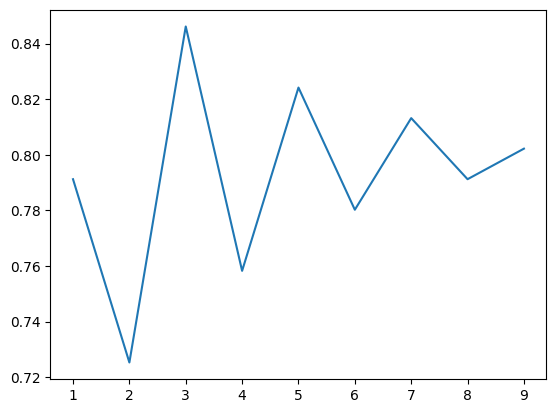

In [54]:
sns.lineplot(x=np.arange(1,10), y=accuracies)

**Question 19** Based on the linegraph, what is the optimal integer number of neighbors (which optimizes the accuracy).

**Answer 19** 3, because accuracy peaks at the x-axis value of 3.

**Run the code** to check the answer mathematically.

In [55]:
# Find the best k
best_k = 1 + np.argmax(accuracies) # add one b/c arrays are 0-indexed
best_accuracy = np.max(accuracies)
print(f"Best k: {best_k}  \nBest Accuracy from kNN: {best_accuracy:.3f}")

Best k: 3  
Best Accuracy from kNN: 0.846


In this lab we saw that with very simple algorithms and no feature engineering, we were able to achieve 84.6% accuracy. There are more elaborate models and tricks that could be used to achieve better accuracy. Whether or not that would be a good idea depends on the intended use of the model predictions.

**Have Fun** Try your hand at adding code to run another classification algorithm. Can you determine the accuracy? Did you beat the 84.6% accuracy of the K-nearest neighbors classification?